## ✨ Step 1: Set up a Jupyter Notebook and Import the Dataset

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = r"C:\Users\Asus\Music\King_County_Housing_Project\notebooks\cleaned_kc_house_data.csv"
df = pd.read_csv(file_path)

# Step 3: Display the first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 📌 Explanation

We import **pandas** for data handling, **NumPy** for numerical operations, and **seaborn** & **matplotlib** for visualization.

### 🔹 Steps:
1. **Load the Dataset**  
   - We use `pd.read_csv()` to read the dataset and store it in the variable `df`.
   
2. **Verify Data Loading**  
   - Calling `df.head()` displays the first few rows, ensuring the dataset is successfully loaded.

📊 These steps help in initial data exploration before proceeding with further analysis.

## ✨ Step 2: Selecting Relevant Variables for Analysis

In [4]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'date'], errors='ignore')

# Check the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## ✂️ Step 2: Remove Unnecessary Columns  

To clean our dataset, I will remove irrelevant columns such as **ID, date, and index (if they exist).**

### 📌 Why?  
- These columns **do not contribute** to the analysis and can be safely removed.  
- Keeping only relevant data improves **efficiency and readability**.

### 🔹 How?  
- We use `df.drop(columns=[...])` to remove unwanted columns.  
- The `errors='ignore'` argument ensures that the code **does not break** if some columns are missing.  
- Calling `df.info()` afterward provides an overview of the cleaned dataset.

## ✨ Step 3: Create a Correlation Matrix Heatmap
Using a **heatmap** to visualize the correlation between variables.

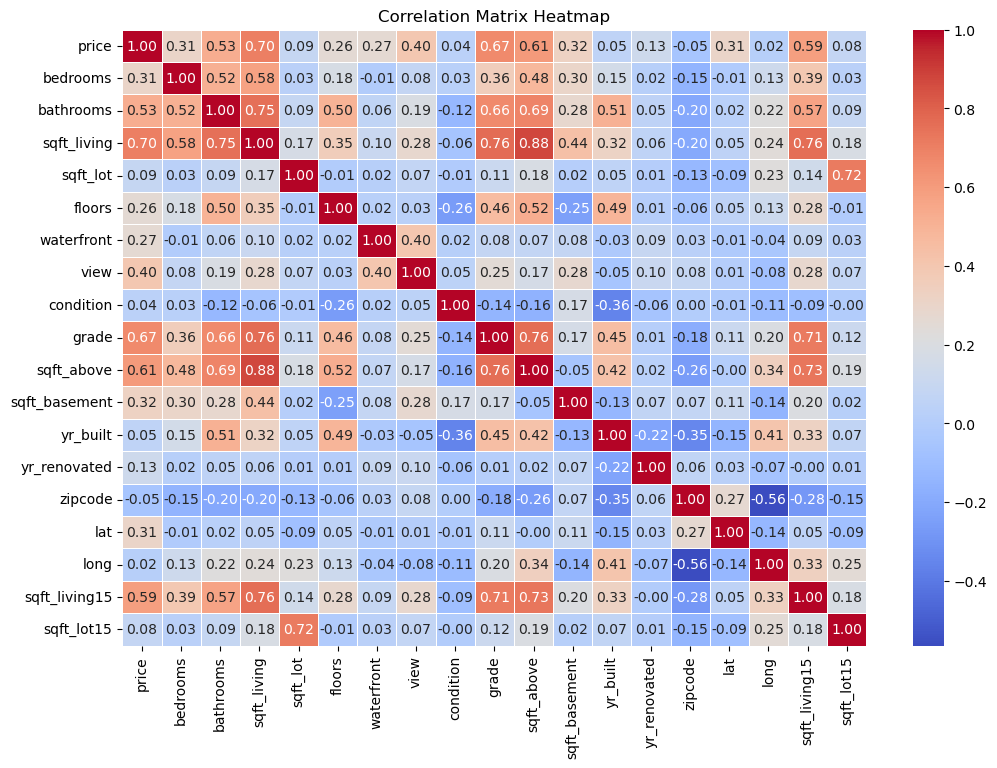

In [5]:
# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 🧐 Explanation: Correlation Matrix Heatmap  

### 📌 What Happens in This Step?  
1. **`df.corr()`**  
   - Computes the **correlation matrix**, showing relationships between numerical variables.  

2. **`sns.heatmap()`**  
   - Visualizes correlations using colors:  
     - 🔴 **Red** → Strong **positive** correlation  
     - 🔵 **Blue** → Strong **negative** correlation  
     - ⚪ **White/light colors** → Weak correlation  

### 📊 Analysis & Insights  
- **Price** is likely to have a **high correlation** with:  
  - **sqft_living** → Larger houses tend to be more expensive.  
  - **Grade** → Higher quality houses usually cost more.  
  - **Bathrooms** → More bathrooms often indicate a bigger/more expensive home.  

- **Year Built (`yr_built`)**  
  - Likely has a **weak correlation** with price.  
  - This suggests **older houses** don’t necessarily cost less.  

✅ **Key Takeaway:** This heatmap helps us understand which features influence price the most! 🚀  

## ✨ Step 4: Scatter Plots for Strongest Correlations
Create scatterplots for highly correlated variables.

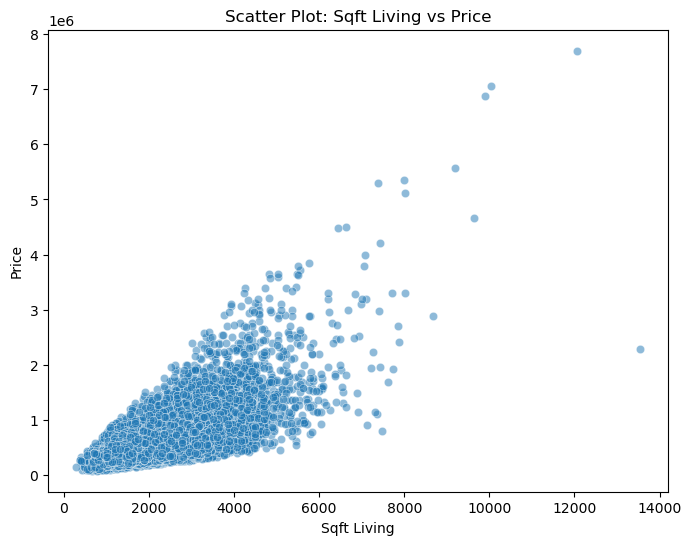

In [6]:
# Scatter plot between price and sqft_living
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'], alpha=0.5)
plt.title("Scatter Plot: Sqft Living vs Price")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

## 📌 Exploring the Relationship Between Square Footage & Price  

### 🔹 Explanation:
- We use `sns.scatterplot()` to **examine the relationship** between `sqft_living` and `price`.  
- A **positive correlation** suggests that **larger houses generally cost more**.  
- This visualization helps confirm the strength of this relationship before applying further analysis.

## ✨ Step 5: Create a Pair Plot
Generate a pair plot to analyze distributions and relationships.

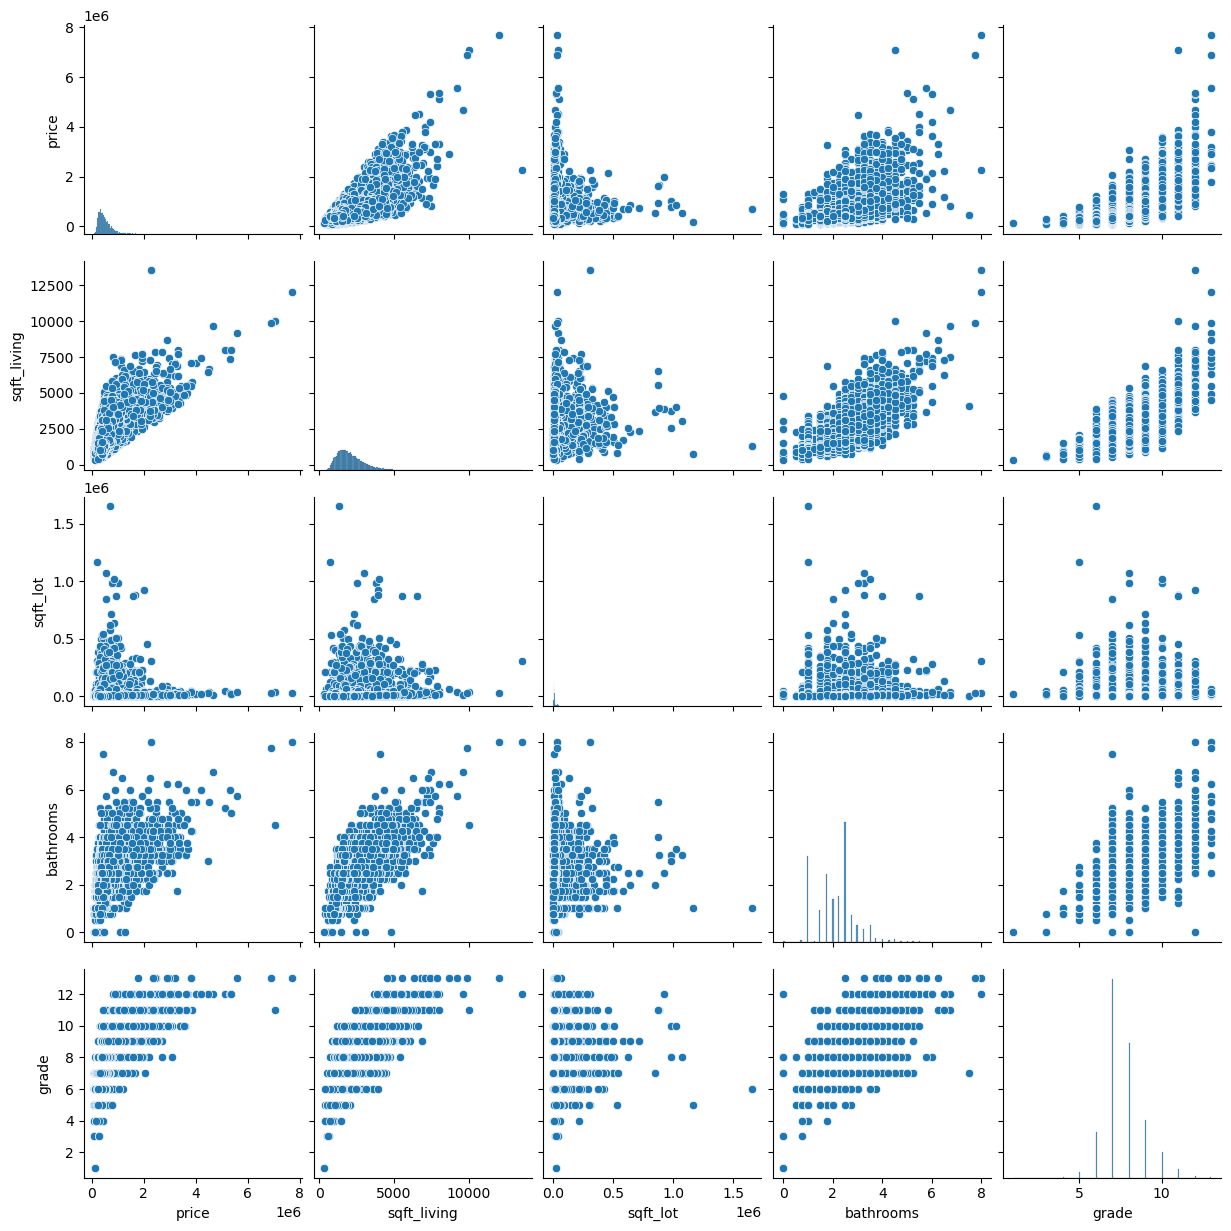

In [8]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'bathrooms', 'grade']])
plt.show()

### 🔹 Explanation:
- A **pair plot** (`sns.pairplot()`) displays **scatter plots** for numerical features.  
- It helps in **spotting patterns** across multiple variable relationships.  
- Useful for identifying **linear and non-linear trends** in the data.  

### 🔍 Analysis:
- If variables show a **linear trend**, they are **strongly correlated** (positive or negative).  
- If the plot appears **randomly scattered**, the correlation is **weak**.

## ✨ Step 6: Categorical Plot
Create a categorical plot to analyze trends in categorical data.

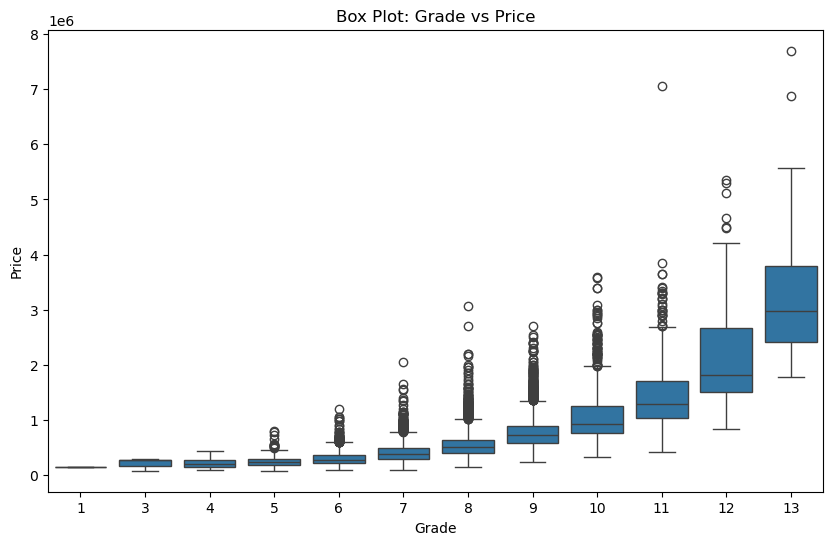

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['grade'], y=df['price'])
plt.title("Box Plot: Grade vs Price")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

### 🔹 Explanation:
- **Boxplots** (`sns.boxplot()`) help visualize the **distribution of house prices** across different `grade` levels.  
- Higher `grade` levels **generally correspond to higher house prices**.  
- This helps in understanding **price variations** within each category.

# 🏡 Step 7: Answering Questions & Generating New Research Questions  

### 📌 Instructions:
- Use insights from the analysis to **answer key questions**.  
- **Formulate new research questions** to explore further.  

### ✅ Example Answers:
**Q1: Which variables impact house prices the most?**  
**Answer:** `sqft_living`, `grade`, and `bathrooms` show the **strongest positive correlation** with price.  

**Q2: Does the number of bedrooms significantly impact price?**  
**Answer:** No, the correlation is **relatively weak** compared to other factors like `sqft_living` and `grade`.  

**Q3: How does house grade affect pricing?**  
**Answer:** Higher-grade houses tend to be **more expensive**.  

### 🔍 New Research Questions:
1️⃣ **How does the presence of a waterfront impact house prices?**  
2️⃣ **What is the relationship between `year_built` and `price`?**  
3️⃣ **Does `lot_size` significantly affect pricing?**  

---

# 🔬 Step 8: Defining Hypotheses  

### 📌 Instructions:
- Formulate **testable hypotheses** based on insights from the data.  

### ✅ Example Hypotheses:
🔹 **Hypothesis 1:** Houses with more `sqft_living` have **higher prices**.  
🔹 **Hypothesis 2:** **Waterfront properties** are significantly **more expensive** than non-waterfront properties.  
🔹 **Hypothesis 3:** The **number of floors** does **not significantly impact** house price.  

✅ These hypotheses will guide further **data exploration and statistical testing**! 📊📈  
